# Task 1

First we have to import all necessary libraries 

In [2]:
from qiskit import *
import random as random
import numpy as np
import matplotlib.pyplot as plt
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

Let's define a function called richard which randomly assigns Alice and Bob a pair of numbers between 1 and 3, signifying the row and the column.

In [3]:
def richard():
    row = random.randint(1,3)
    col = random.randint(1,3)
    return (row, col)

For each box assigned to Alice and Bob, we need to give them a qubit. Now we have to define a function which would random assign Alice and Bob qubits. 

In [4]:
possible_qubits = ['000', '001', '010', '011', '100', '101', '110', '111']

def alice_qubits():
    random_number = random.randint(0, 7)
    return possible_qubits[random_number]

def bob_qubits():
    random_number = random.randint(0, 7)
    return possible_qubits[random_number]

Before doing anythong else, we need to define our oracles. After random chosing their qubits which qubits Alics and Bob would place in their respective rows or columns, they would have to implement a particular series of gates so as to initialse all qubits to 0. Alice would be assigned the first three qubits, and Bob the last 3 qubits.

In [5]:
def initialise_alice_qubits(alice_qubits, circuit):
    for i in range(3):
        if alice_qubits[i] == '1':
            qc.x(i)

def initialise_bob_qubits(bob_qubits, circuit):
    for i in range(3):
        if bob_qubits[i] == '1':
            qc.x(i+3)
    
    qc.barrier()

Depending on which random row and column have been assigned, we would have to make a circuit with different gates. 

In [6]:
def create_main_circuit(circuit, row, col):
    
    if (row, col) == (1, 1):
        # putting the commom qubits between Alice and Bob in an equal superposition of |00> and |11> so that they are always equal
        circuit.h(0)
        circuit.cx(0, 3)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(1)
        circuit.cx(1, 2)
        circuit.cx(0, 1)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(4)
        circuit.cx(4, 5)
        circuit.x(4)
        circuit.cx(3, 4)
        circuit.barrier()
    
    # now we have to create the exact same circuit for each row and column combinatoin
    
    elif (row, col) == (1, 2):
        circuit.cx(1, 3)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(0)
        circuit.cx(0, 2)
        circuit.cx(1, 0)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(4)
        circuit.cx(4, 5)
        circuit.x(4)
        circuit.cx(3, 4)
        circuit.barrier()
        
    elif (row, col) == (1, 3):
        circuit.h(2)
        circuit.cx(2, 3)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(0)
        circuit.cx(0, 1)
        circuit.cx(2, 0)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(4)
        circuit.cx(4, 5)
        circuit.x(4)
        circuit.cx(3, 4)
        circuit.barrier()
        
    elif (row, col) == (2, 1):
        circuit.h(0)
        circuit.cx(0, 4)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(1)
        circuit.cx(1, 2)
        circuit.cx(0, 1)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(3)
        circuit.cx(3, 5)
        circuit.x(3)
        circuit.cx(4, 3)
        circuit.barrier()
    
    elif (row, col) == (2, 2):
        circuit.h(1)
        circuit.cx(1, 4)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(0)
        circuit.cx(0, 2)
        circuit.cx(1, 0)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(3)
        circuit.cx(3, 5)
        circuit.x(3)
        circuit.cx(4, 3)
        circuit.barrier()
        
    elif (row, col) == (2, 3):
        circuit.h(2)
        circuit.cx(2, 4)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(0)
        circuit.cx(0, 1)
        circuit.cx(2, 0)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(3)
        circuit.cx(3, 5)
        circuit.x(3)
        circuit.cx(4, 3)
        circuit.barrier()
        
    elif (row, col) == (3, 1):
        circuit.h(0)
        circuit.cx(0, 5)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(1)
        circuit.cx(1, 2)
        circuit.cx(0, 1)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(4)
        circuit.cx(4, 3)
        circuit.x(4)
        circuit.cx(3, 4)
        circuit.barrier()
        
    elif (row, col) == (3, 2):
        circuit.h(1)
        circuit.cx(1, 5)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(0)
        circuit.cx(0, 2)
        circuit.cx(1, 0)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(4)
        circuit.cx(4, 3)
        circuit.x(4)
        circuit.cx(3, 4)
        circuit.barrier()
    
    elif (row, col) == (3, 3):
        circuit.h(2)
        circuit.cx(2, 5)
        circuit.barrier()
        # putting the rest of alice's qubits in a favorable superposition
        circuit.h(0)
        circuit.cx(0, 1)
        circuit.cx(2, 0)
        circuit.barrier()
        # putting bob's qubits in a favorable superposition
        circuit.h(4)
        circuit.cx(4, 3)
        circuit.x(4)
        circuit.cx(3, 4)
        circuit.barrier()

Let's define a little function to measure all qubits.

In [7]:
def measurement(circuit):
    for i in range(6):
        circuit.measure(i, i)

Now that we have everything in place, we can start making the circuit for real. Let's define all the prerequisites.  

Alice: 010, Bob: 101


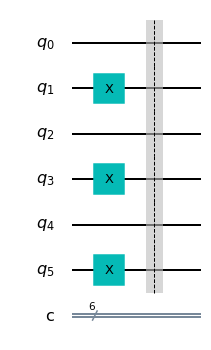

In [8]:
row, col = richard()
state_of_alice_qubits = alice_qubits()
state_of_bob_qubits = bob_qubits()

qc = QuantumCircuit(6,6)
# Now let's assign Alice's and Bob's qubits randomly as they chose 

for i in range(3):
    if state_of_alice_qubits[i] == '1':
        qc.x(i)
  
for i in range(3):
    if state_of_bob_qubits[i] == '1':
        qc.x(i+3)

qc.barrier()

print(f'Alice: {state_of_alice_qubits}, Bob: {state_of_bob_qubits}')
qc.draw('mpl')

After the circuit has been prepared randomly, Alice and Bob would have to apply the initiLise gate combination defined long back. 

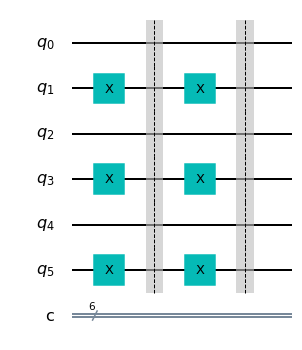

In [9]:
initialise_alice_qubits(state_of_alice_qubits, qc)
initialise_bob_qubits(state_of_bob_qubits, qc)

qc.draw('mpl')

Now let's inplement the main circuit

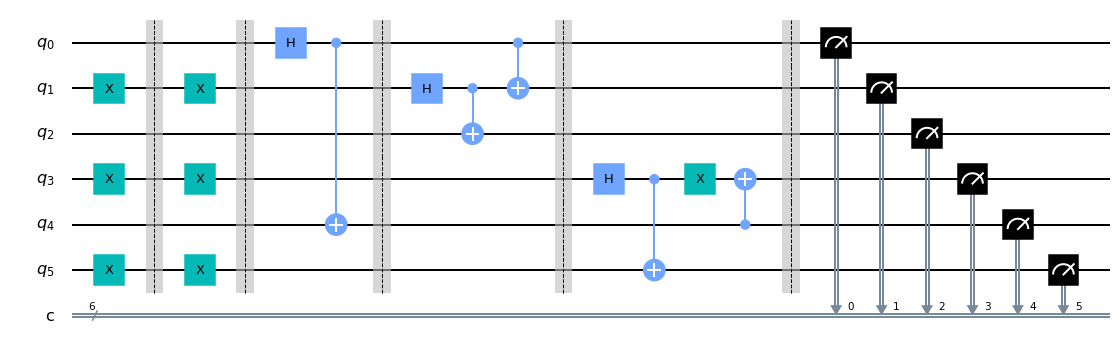

In [10]:
create_main_circuit(qc, row, col)
measurement(qc)
qc.draw('mpl')

Setting up simulator to get measurements.

{'010011': 122, '010101': 136, '100000': 140, '100110': 126, '111011': 136, '111101': 124, '001000': 121, '001110': 119}


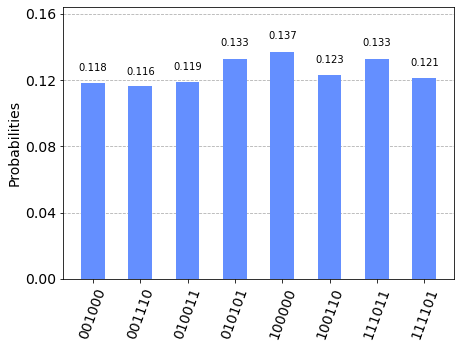

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Let's define a function to test whether the conditions of the questions were met. That is, the binary sum (XOR) of all of Alice's Qubits is 0 and Bob's Qubits is 1.

Remember, because of qiskit indexing, Alice's qubits are the last 3, whereas Bob's qubits are the first 3. 

In [12]:
def xor_check_for_Bob(counts):
    states_of_bob = []
    
    for qubits in counts:
        states_of_bob.append(qubits[0:3])
    
    print(f'Bob qubits: {states_of_bob}')
    
    for state in states_of_bob:
        print(f'Binary sum of {state}: {int(state[0])^int(state[1])^int(state[2])}')

def xor_check_for_Alice(counts):
    states_of_Alice = []
    
    for qubits in counts:
        states_of_Alice.append(qubits[3:6])
    
    print(f'Alice qubits: {states_of_Alice}')
          
    for state in states_of_Alice:
        print(f'Binary sum of {state}: {int(state[0])^int(state[1])^int(state[2])}')

Now, we have to check the second condition. The common box between Alice and Bob must contain 2 qubits in the same state. 

In [13]:
def check_commonality(row, col):
    indexes_to_check = []
    
    if (row, col) == (1,1):
        indexes_to_check = [0,3]   
    elif (row, col) == (1,2):
        indexes_to_check = [1,3]
    elif (row, col) == (1,3):
        indexes_to_check = [2,3]
    
    elif (row, col) == (2,1):
        indexes_to_check = [0,4]
    elif (row, col) == (2,2):
        indexes_to_check = [1,4]
    elif (row, col) == (2,3):
        indexes_to_check = [2,4]
    
    elif (row, col) == (3,1):
        indexes_to_check = [0,5]
    elif (row, col) == (3,2):
        indexes_to_check = [1,5]
    elif (row, col) == (3,3):
        indexes_to_check = [2,5]
    
    return indexes_to_check

In [14]:
alice_index, bob_index = check_commonality(row, col)

for qubits in counts:
    print(f'For the state {qubits}, in the box they share, Alice qubit: {qubits[alice_index]}, Bob qubit: {qubits[bob_index]}')
    print()
    

For the state 010011, in the box they share, Alice qubit: 0, Bob qubit: 1

For the state 010101, in the box they share, Alice qubit: 0, Bob qubit: 0

For the state 100000, in the box they share, Alice qubit: 1, Bob qubit: 0

For the state 100110, in the box they share, Alice qubit: 1, Bob qubit: 1

For the state 111011, in the box they share, Alice qubit: 1, Bob qubit: 1

For the state 111101, in the box they share, Alice qubit: 1, Bob qubit: 0

For the state 001000, in the box they share, Alice qubit: 0, Bob qubit: 0

For the state 001110, in the box they share, Alice qubit: 0, Bob qubit: 1



I will son upload a handwritten file in this very folder explaining why this methid works. 